Cardio Good Fitness Analysis

In [2]:
?

In [6]:
# Welcome to the Jupyter noteboook for the analysis of the Cardio Good Fitness Treadmill. You will find three stages of the analysis of this information. Pre-processing, Exploratory Data Analysis (univariate and multivariate), and final examination to draw conclusions. 

In [7]:
#Pre-processing

In [1]:
import numpy as np # general opening code
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
%matplotlib inline
import statistics
import csv as csv
import warnings 
warnings.filterwarnings ('ignore')

In [2]:
f = open (r'/Users/jameswatt/Documents/CardioGoodFitness.csv') # This is the location of the data on a Mac computer.

FileNotFoundError: [Errno 2] No such file or directory: '/Users/jameswatt/Documents/CardioGoodFitness.csv'

In [ ]:
CGF = pd.read_csv (r'/Users/jameswatt/Documents/CardioGoodFitness.csv')
print (CGF) # initial data examination

In [11]:
df_head = pd.DataFrame.head

In [12]:
df_head (CGF) # This is the initial view of the CGF data as a Python DataFrame.

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [13]:
df = pd.DataFrame (CGF)
av_CGF = df.mean (axis = 0)
print (av_CGF) # Looking at the average data of our customers. Some of the information is categorical, such as Gender and MaritalStatus. 
#The mean of the data is part of the statistical summary. 

Age             28.788889
Education       15.572222
Usage            3.455556
Fitness          3.311111
Income       53719.577778
Miles          103.194444
dtype: float64


Note: Averaging 'Gender' or 'Maritalstatus' can provide uncertainty. The Mode is a better measure of customer type in categorical data fields.  

In [14]:
np.info (CGF) # This is a plain text description of the CGF data. 

Two-dimensional, size-mutable, potentially heterogeneous tabular data.

Data structure also contains labeled axes (rows and columns).
Arithmetic operations align on both row and column labels. Can be
thought of as a dict-like container for Series objects. The primary
pandas data structure.

Parameters
----------
data : ndarray (structured or homogeneous), Iterable, dict, or DataFrame
    Dict can contain Series, arrays, constants, dataclass or list-like objects. If
    data is a dict, column order follows insertion-order.

    .. versionchanged:: 0.25.0
       If data is a list of dicts, column order follows insertion-order.

index : Index or array-like
    Index to use for resulting frame. Will default to RangeIndex if
    no indexing information part of input data and no index provided.
columns : Index or array-like
    Column labels to use for resulting frame. Will default to
    RangeIndex (0, 1, 2, ..., n) if no column labels are provided.
dtype : dtype, default None
    Data type

In [15]:
df.describe () # Initial numerical examination of quartile ranges, mean, minimum and maximum as well as other data.

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [16]:
def Gender_to_numeric(x): # In order to deal with 'Gender' in comparison to other columnar data, it will need to be numeric. 
    if x=='Female': return 2
    if x=='Male': return 1
df ['GenderNumber']= df ['Gender'].apply (Gender_to_numeric) 
print (df)

    Product  Age  Gender  Education MaritalStatus  Usage  Fitness  Income  \
0     TM195   18    Male         14        Single      3        4   29562   
1     TM195   19    Male         15        Single      2        3   31836   
2     TM195   19  Female         14     Partnered      4        3   30699   
3     TM195   19    Male         12        Single      3        3   32973   
4     TM195   20    Male         13     Partnered      4        2   35247   
..      ...  ...     ...        ...           ...    ...      ...     ...   
175   TM798   40    Male         21        Single      6        5   83416   
176   TM798   42    Male         18        Single      5        4   89641   
177   TM798   45    Male         16        Single      5        5   90886   
178   TM798   47    Male         18     Partnered      4        5  104581   
179   TM798   48    Male         18     Partnered      4        5   95508   

     Miles  GenderNumber  
0      112             1  
1       75           

In [17]:
def product_to_numeric(x): # In order to deal with 'Product' in comparison to other colummar data, it will need to be numeric. 
    if x=='TM798': return 3
    if x=='TM195': return 1
    if x=='TM495': return 2
df ['ProductNumber']= df ['Product'].apply (product_to_numeric) 
print (df)

    Product  Age  Gender  Education MaritalStatus  Usage  Fitness  Income  \
0     TM195   18    Male         14        Single      3        4   29562   
1     TM195   19    Male         15        Single      2        3   31836   
2     TM195   19  Female         14     Partnered      4        3   30699   
3     TM195   19    Male         12        Single      3        3   32973   
4     TM195   20    Male         13     Partnered      4        2   35247   
..      ...  ...     ...        ...           ...    ...      ...     ...   
175   TM798   40    Male         21        Single      6        5   83416   
176   TM798   42    Male         18        Single      5        4   89641   
177   TM798   45    Male         16        Single      5        5   90886   
178   TM798   47    Male         18     Partnered      4        5  104581   
179   TM798   48    Male         18     Partnered      4        5   95508   

     Miles  GenderNumber  ProductNumber  
0      112             1         

In [18]:
def MaritalStatus_to_numeric(x): # MaritalStatus will also need to be numeric.
    if x=='Partnered': return 2
    if x=='Single': return 1
df ['MaritalStatusNum']= df ['MaritalStatus'].apply (MaritalStatus_to_numeric) 
print (df)

    Product  Age  Gender  Education MaritalStatus  Usage  Fitness  Income  \
0     TM195   18    Male         14        Single      3        4   29562   
1     TM195   19    Male         15        Single      2        3   31836   
2     TM195   19  Female         14     Partnered      4        3   30699   
3     TM195   19    Male         12        Single      3        3   32973   
4     TM195   20    Male         13     Partnered      4        2   35247   
..      ...  ...     ...        ...           ...    ...      ...     ...   
175   TM798   40    Male         21        Single      6        5   83416   
176   TM798   42    Male         18        Single      5        4   89641   
177   TM798   45    Male         16        Single      5        5   90886   
178   TM798   47    Male         18     Partnered      4        5  104581   
179   TM798   48    Male         18     Partnered      4        5   95508   

     Miles  GenderNumber  ProductNumber  MaritalStatusNum  
0      112     

In [19]:
Mode_CGF = df.mode (axis = 0)
print (Mode_CGF) # This displays our most frequent customer type.

  Product  Age Gender  Education MaritalStatus  Usage  Fitness  Income  Miles  \
0   TM195   25   Male         16     Partnered      3        3   45480     85   

   GenderNumber  ProductNumber  MaritalStatusNum  
0             1            1.0                 2  


In [20]:
Median_CGF = df.median (axis = 0)
print (Median_CGF) # This displays the categorical middle of the customer data. 

Age                    26.0
Education              16.0
Usage                   3.0
Fitness                 3.0
Income              50596.5
Miles                  94.0
GenderNumber            1.0
ProductNumber           1.0
MaritalStatusNum        2.0
dtype: float64


In [21]:
pd.isnull ('CGF') # False indicates no missing values in the data set. 

False

In [22]:
df.isna().sum() # confirming no missing values. 

Product              0
Age                  0
Gender               0
Education            0
MaritalStatus        0
Usage                0
Fitness              0
Income               0
Miles                0
GenderNumber         0
ProductNumber       60
MaritalStatusNum     0
dtype: int64

In [23]:
df.shape # This is the shape of the data. 180 Rows and 9 columns. This data is also given by "df.head".

(180, 12)

In [24]:
df.describe (exclude='number').T # Most of this data is already provided, but it does identify that there are 3 products, and which product occurs most often.

,count,unique,top,freq
Product,180,3,TM195,80
Gender,180,2,Male,104
MaritalStatus,180,2,Partnered,107


In [25]:
#Univariate analysis

It is necessary to modify some data; Creating a copy will preserve the original data. 

In [26]:
cgf_c= df.copy ()

In [27]:
print (cgf_c)# Displays the copy.

    Product  Age  Gender  Education MaritalStatus  Usage  Fitness  Income  \
0     TM195   18    Male         14        Single      3        4   29562   
1     TM195   19    Male         15        Single      2        3   31836   
2     TM195   19  Female         14     Partnered      4        3   30699   
3     TM195   19    Male         12        Single      3        3   32973   
4     TM195   20    Male         13     Partnered      4        2   35247   
..      ...  ...     ...        ...           ...    ...      ...     ...   
175   TM798   40    Male         21        Single      6        5   83416   
176   TM798   42    Male         18        Single      5        4   89641   
177   TM798   45    Male         16        Single      5        5   90886   
178   TM798   47    Male         18     Partnered      4        5  104581   
179   TM798   48    Male         18     Partnered      4        5   95508   

     Miles  GenderNumber  ProductNumber  MaritalStatusNum  
0      112     

In [28]:
#make a list of the possible categorical variables. This will aid in discovering new opportunities. 
cat_col=('Product', 'Gender', 'MaritalStatus')
for column in cat_col: print(df[column].value_counts() )
    #TM195 is assumed to be the entry level product.
    #TM498 is assumed to be the mid-range product.
    #TM798 is assumed to be the highest quality and highest cost product. 

TM195    80
TM498    60
TM798    40
Name: Product, dtype: int64
Male      104
Female     76
Name: Gender, dtype: int64
Partnered    107
Single        73
Name: MaritalStatus, dtype: int64


In [29]:
df.groupby (['Product', 'Fitness', 'Usage']).count()# Data to show several things: reports of higher 'Fitness' with TM195 are few. 'Usage'with TM798 is greater than either of the other models.
# This may be an approach for multi-variate analysis.

Age  Gender  Education  MaritalStatus  Income  Miles  \
Product Fitness Usage                                                         
TM195   1       3        1       1          1              1       1      1   
        2       2        9       9          9              9       9      9   
                3        4       4          4              4       4      4   
                4        1       1          1              1       1      1   
        3       2       10      10         10             10      10     10   
                3       27      27         27             27      27     27   
                4       17      17         17             17      17     17   
        4       3        5       5          5              5       5      5   
                4        3       3          3              3       3      3   
                5        1       1          1              1       1      1   
        5       4        1       1          1              1       1      1   
                5        1       1          1              1       1      1   
TM498   1       2        1       1          1              1       1      1   
        2       2        5       5          5              5       5      5   
                3        6       6          6              6       6      6   
                4        1       1          1              1       1      1   
        3       2        8       8          8              8       8      8   
                3       20      20         20             20      20     20   
                4        9       9          9              9       9      9   
                5        2       2          2              2       2      2   
        4       3        5       5          5              5       5      5   
                4        2       2          2              2       2      2   
                5        1       1          1              1       1      1   
TM798   3       4        4       4          4              4       4      4   
        4       4        2       2          2              2       2      2   
                5        4       4          4              4       4      4   
                6        1       1          1              1       1      1   
        5       3        1       1          1              1       1      1   
                4       12      12         12             12      12     12   
                5        8       8          8              8       8      8   
                6        6       6          6              6       6      6   
                7        2       2          2              2       2      2   

                       GenderNumber  ProductNumber  MaritalStatusNum  
Product Fitness Usage                                                 
TM195   1       3                 1              1                 1  
        2       2                 9              9                 9  
                3                 4              4                 4  
                4                 1              1                 1  
        3       2                10             10                10  
                3                27             27                27  
                4                17             17                17  
        4       3                 5              5                 5  
                4                 3              3                 3  
                5                 1              1                 1  
        5       4                 1              1                 1  
                5                 1              1                 1  
TM498   1       2                 1              0                 1  
        2       2                 5              0                 5  
                3                 6              0                 6  
                4                 1              0                 1  
        3       2                 8              0        

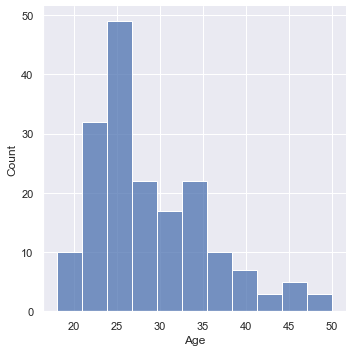

In [30]:
sns.displot (cgf_c['Age']) # shows age data diminishing.

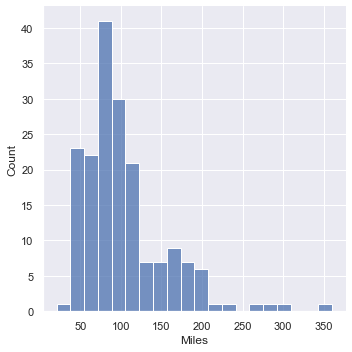

In [31]:
sns.displot (cgf_c['Miles'])# miles drop-and reporting also. Milage drop is expected; reporting unfortunate. 

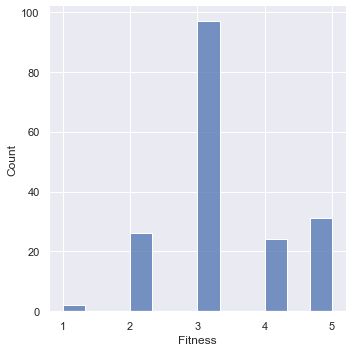

In [32]:
sns.displot (cgf_c['Fitness']) #No further analysis needed (#NFA).

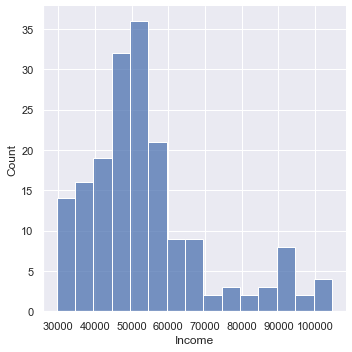

In [33]:
sns.displot (cgf_c['Income']) # income reporting drops. Data drops can skew results.

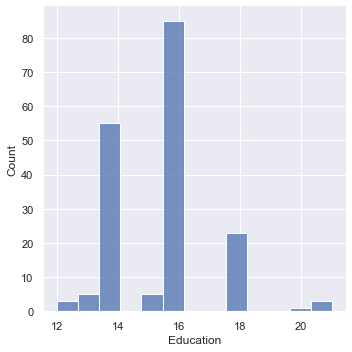

In [34]:
sns.displot (cgf_c['Education'])#NFA.

<AxesSubplot:>

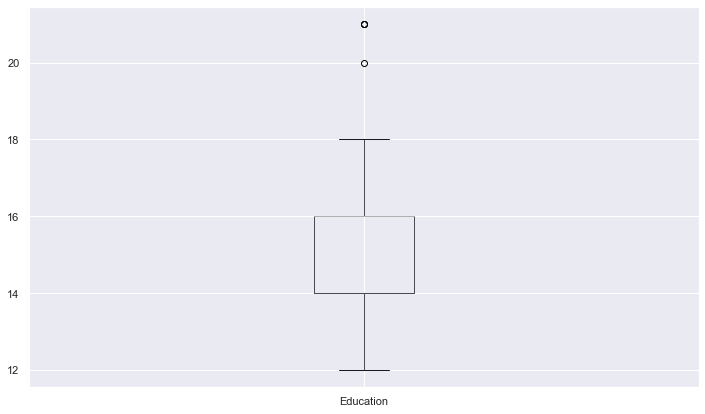

In [35]:
df.boxplot (column= ['Education'], figsize= (12,7))#NFA

<AxesSubplot:>

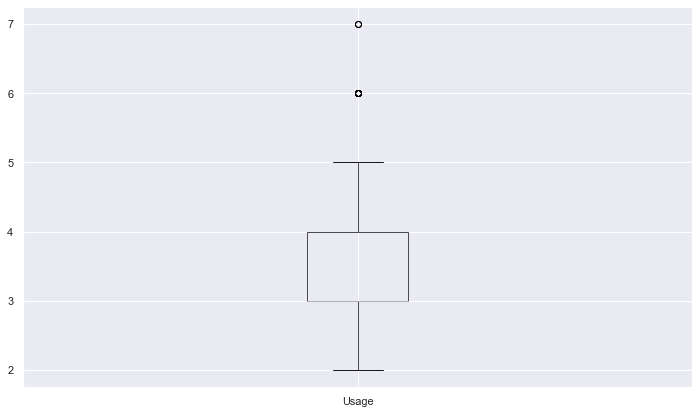

In [36]:
df.boxplot (column= ['Usage'], figsize= (12,7))#NFA

<AxesSubplot:>

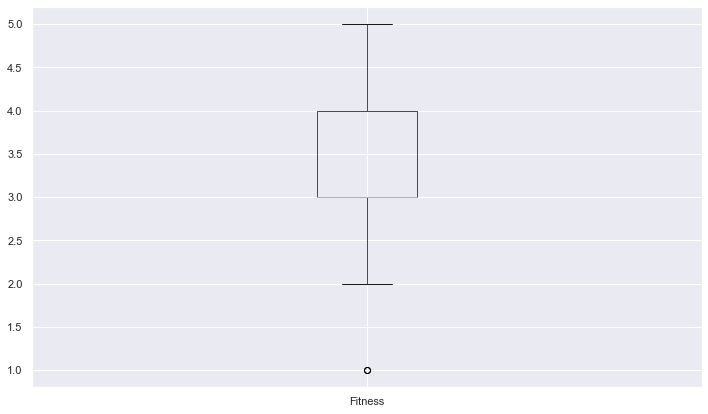

In [37]:
df.boxplot (column= ['Fitness'], figsize= (12,7))
# This scale is based on an abstract self assessed value for the customer's fitness. 5 indicates very fit. 

<AxesSubplot:>

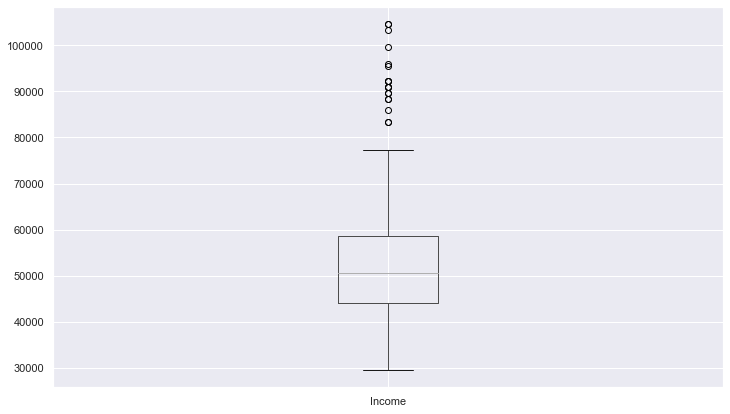

In [38]:
df.boxplot (column= ['Income'], figsize= (12,7))#NFA

<AxesSubplot:>

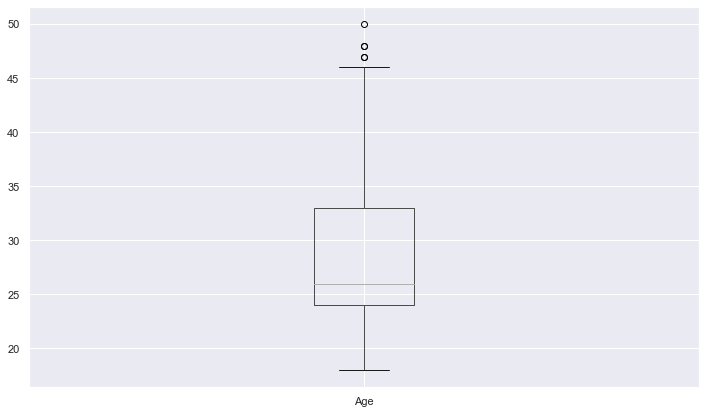

In [39]:
df.boxplot (column= ['Age'], figsize= (12,7))#NFA

<AxesSubplot:>

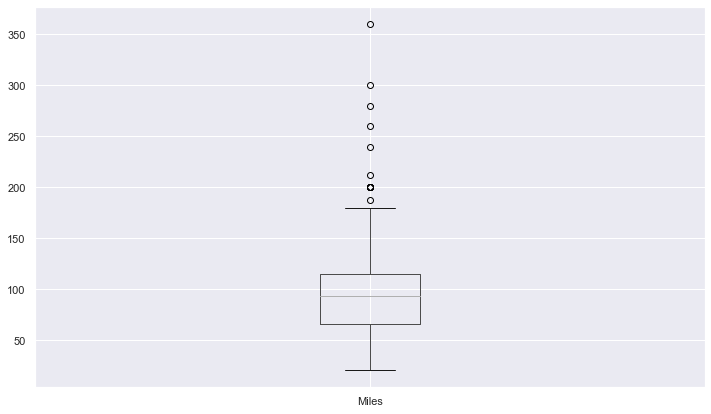

In [40]:
df.boxplot (column= ['Miles'], figsize= (12,7))#NFA

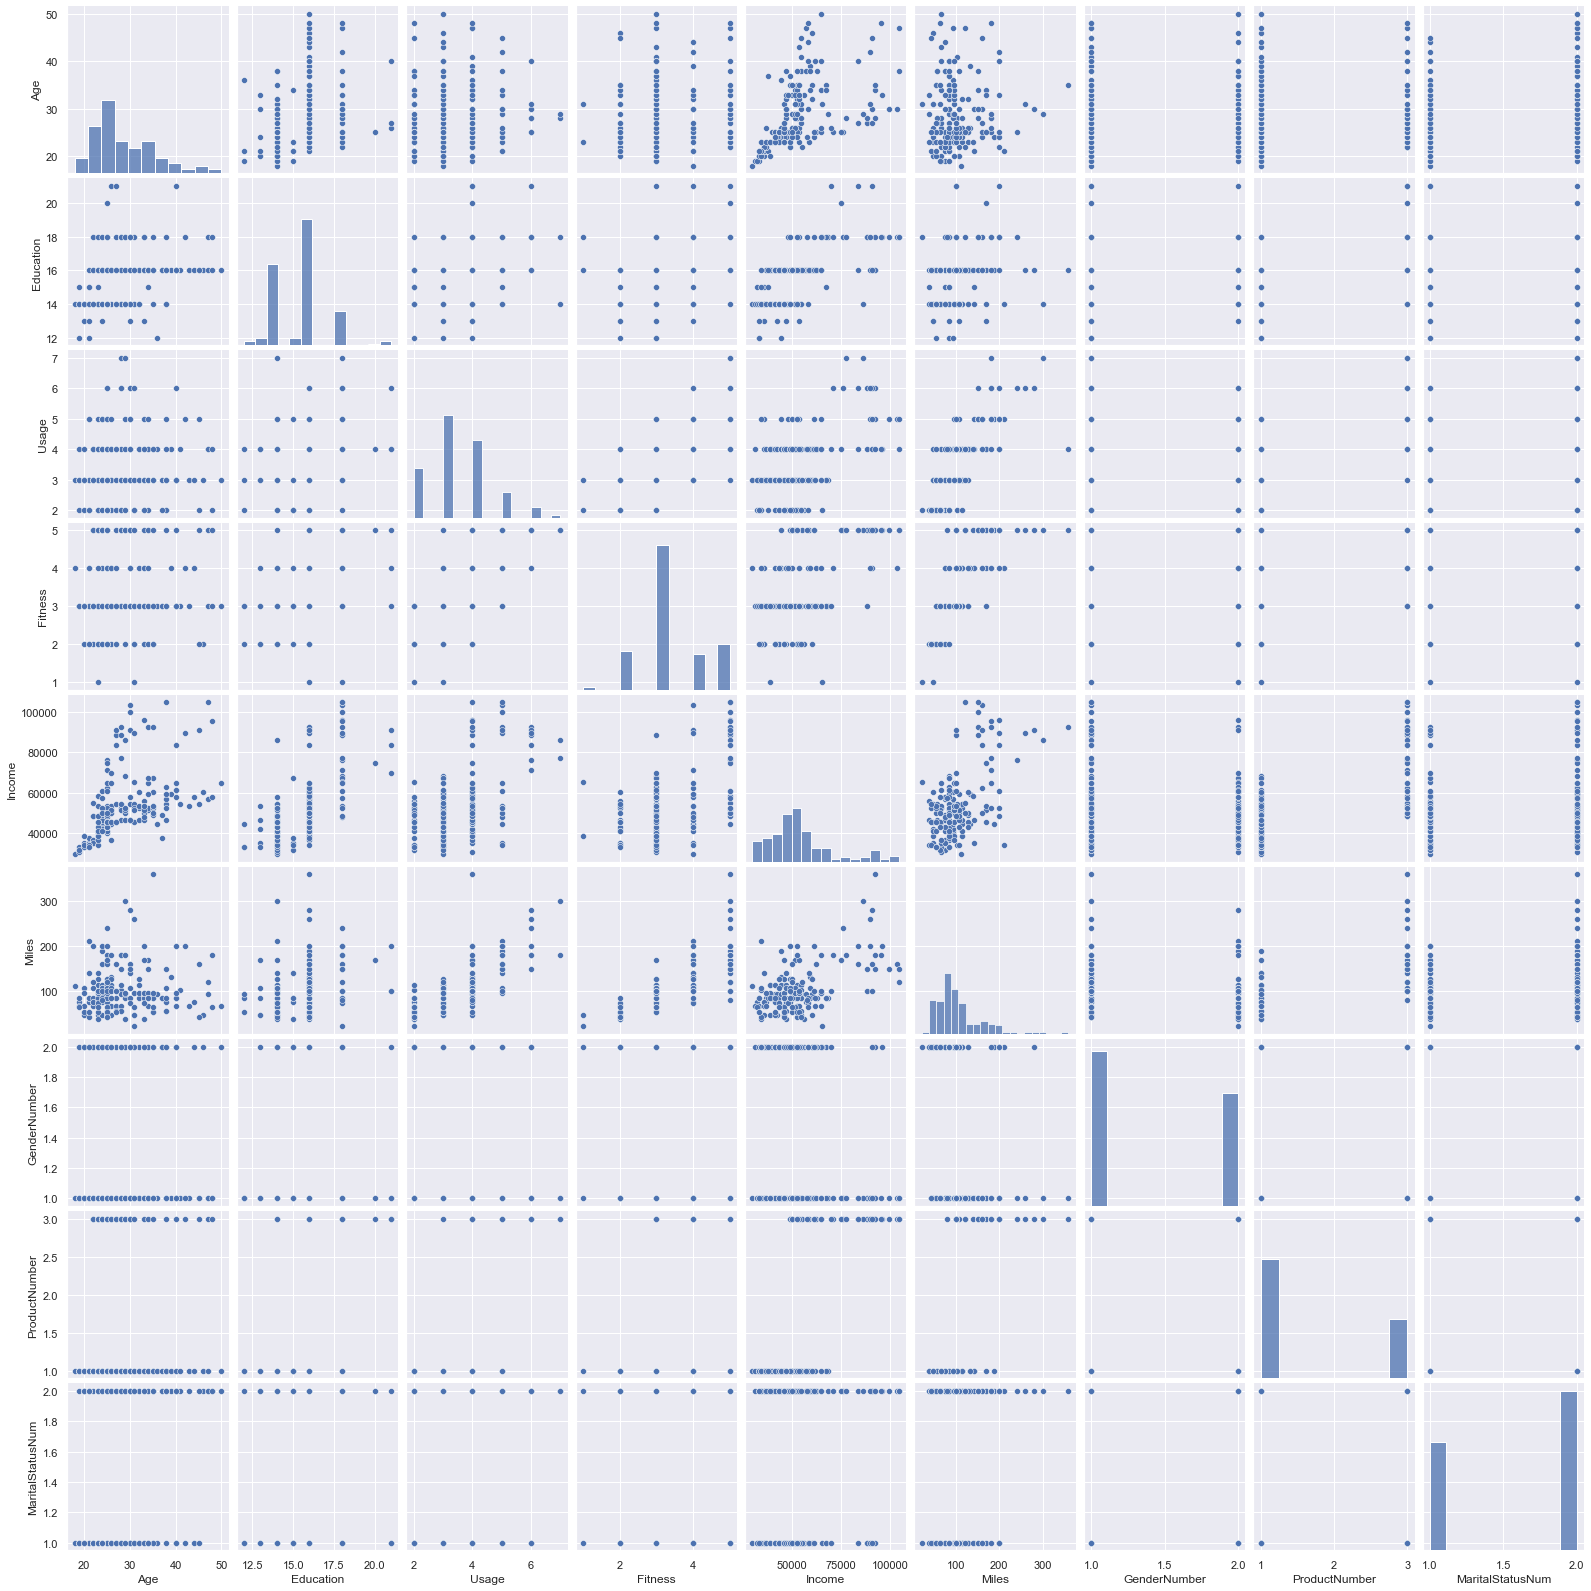

In [41]:
#Multivariate Analysis
sns.pairplot (cgf_c) # A very broad look at each category of data against the others. 

In [42]:
# now check for correlation in a heatmap. 
num_var= ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles', 'GenderNumber', 'MaritalStatus']
corr=df[num_var].corr()
# Now plot the heatmap.
plt.figure(figsize=(12, 7))

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

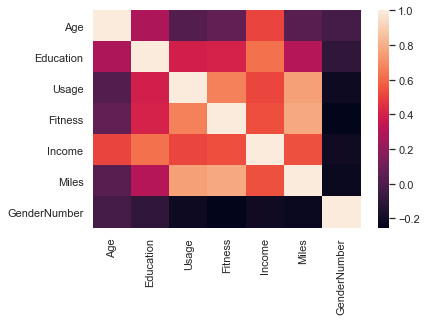

In [43]:
sns.heatmap(corr)
plt.show() # some very valuable correlation is indicated; usage and miles- fitness and usage; income is correlated to many categories.

We can see high correlation between milage, usage, and fitness; since fitness is a self-evaluated factor, it reflects the user's identity. 
This correlation reinforces that usage equates to more miles completed, and correlates to increased impressions of fitness. 
This is targetable as sales data as it associates device usage to increased impressions of self-fitness.

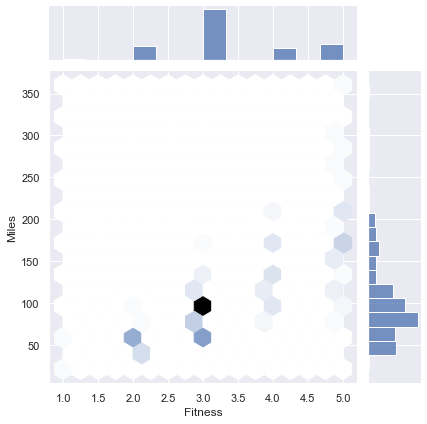

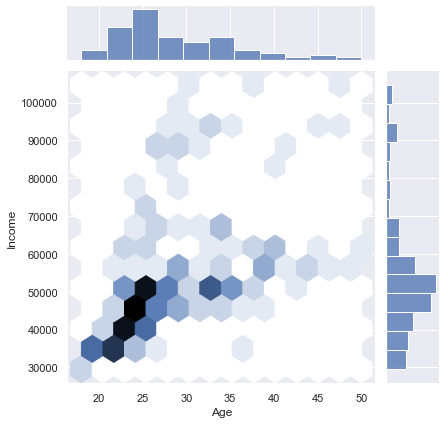

In [44]:
sns.jointplot(cgf_c['Fitness'], cgf_c['Miles'], kind='hex'); # Increasing 'Miles' correlates to increasing self assessed 'Fitness' levels; 
sns.jointplot(cgf_c['Age'], cgf_c['Income'], kind="hex");# Age appears to increase correspondingly with income

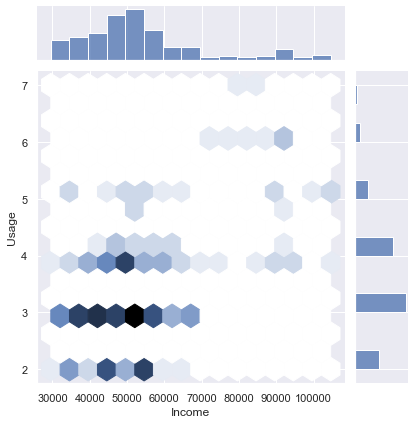

In [45]:
sns.jointplot(cgf_c['Income'], cgf_c['Usage'], kind="hex"); 
# Incomes of $70,000 and below tend to correlate with usage at 4 and below. 

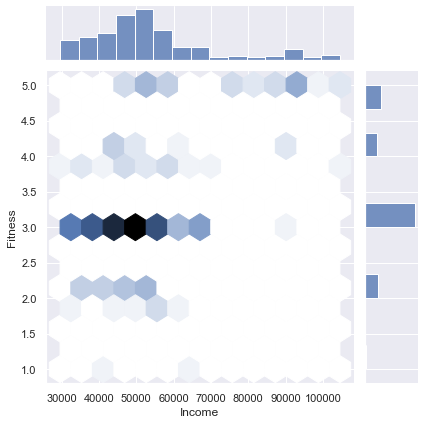

In [46]:
sns.jointplot(cgf_c['Income'], cgf_c['Fitness'], kind="hex"); # Now to examine 'Fitness' related to 'Income'

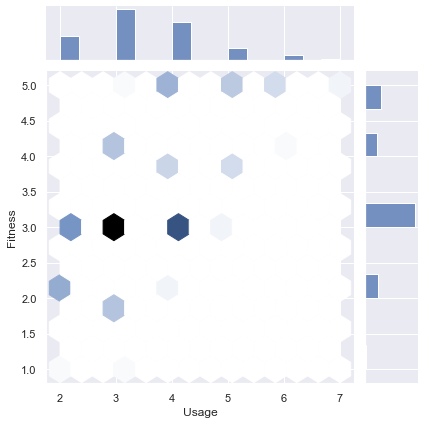

In [47]:
sns.jointplot(cgf_c['Usage'], cgf_c['Fitness'], kind="hex"); # It became necessary to correlate 'Fitness' and 'Usage'

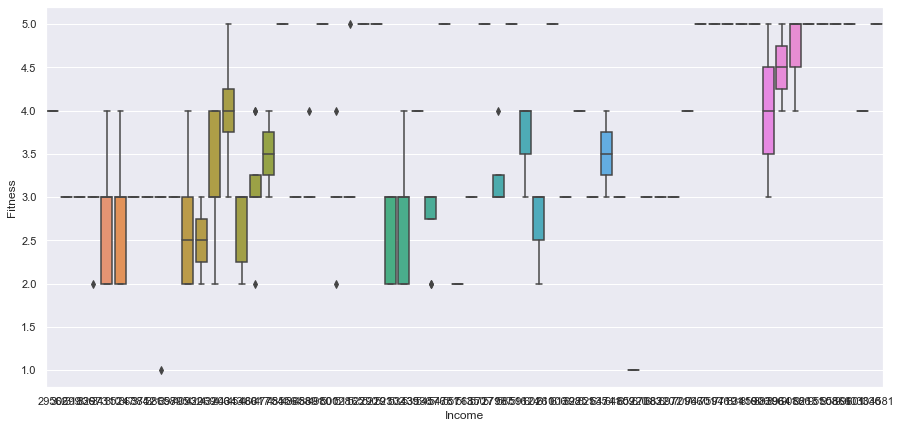

In [48]:
plt.figure(figsize=(15,7))           
sns.boxplot(df['Income'],df['Fitness'])
plt.ylabel('Fitness')
plt.xlabel('Income')
plt.show() # There is too much information to share this chart, but it proves that income trend clearly aligns with higher fitness. 
# If I was better with Python visulization, a chart such as this can easily present fitness according to income

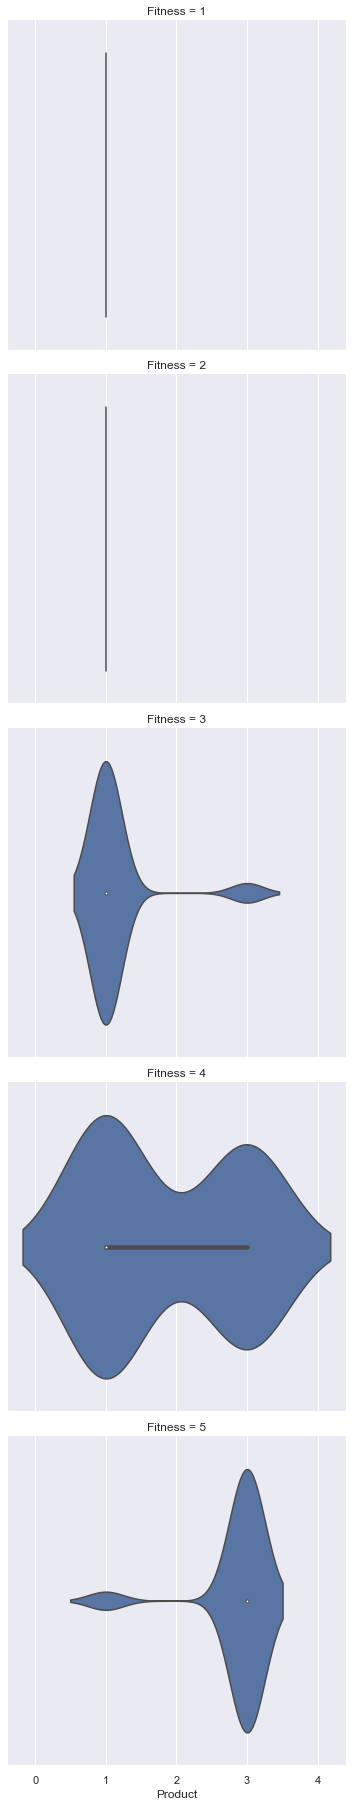

In [49]:
sns.catplot(x='ProductNumber',
             col='Fitness', 
             data=df,
             col_wrap=1,
             kind="violin")
plt.xlabel('Product')
plt.show() # These violin charts are excellent for indicating clustering of data

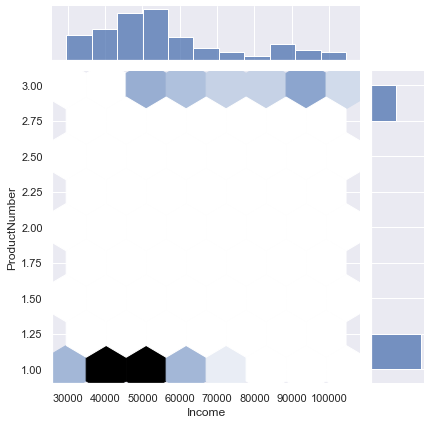

In [50]:
sns.jointplot(cgf_c['Income'], cgf_c['ProductNumber'], kind="hex"); # This data clearly shows the income trend to the different product line.
# It would be beneficial to associate the 'ProductNumber' to the 'Product' for clarity. I'll ask for support on this. 

Insight and Conclusions: I conducted analysis of 180 product files (rows of data) across all 9 fields (columns) of information reported by the Cardio Good Fitness systems. 

The average Cardio Good Fitness customer is a married 28-year old male with an average income of $53K, and strongly tends to use the TM195 product. The average customer tends to rate themselves a 3 on the Cardio Good Fitness 'Fitness' scale.   

The main feature of this analysis is the self-identified characteristic of 'Fitness,' which is an individual determined factor that users self select and indicates the user's perceived level of cardio-vascular health and muscular ability. 

The factor of 'fitness' is an excellent benchmark on how Cardio Good Fitness products serve our customer base. It is telling that customers who self-report higher levels of fitness also trend towards the TM798, our highest quality running machine. It is also telling that there is a positive correlation between the self-reported category of 'Fitness' and 'Miles'. This lends credibility to the self-reporting of fitness, and also reinforces the value proposition of the TM798. Note: TM498 has broad applicablity at multiple 'Fitness' levels.   

Lastly, there is high correlation between advanced customer age and income, as well as income and use of the TM798. Thus, we can safely conclude that the TM798 serves our highest income quartile customers, who have advanced age and income, and also trend well above average on miles run per month. 

It is important to note that there is a drop in the number of customers for the TM798, and the data group is not equal in size to that of the TM195 (40 customer reports to 80). Although this is a deficit in the reporting data, it also represents an opportunity for potentially doubling future sales. 


Recommendations: Customer age is inevitable; indicative data can be applied to show that with age our customers will tend to increase in income. 

The first recommendation is to continue to retain customers as age and income increases. Customer reporting drops after age 35 and also as income exceeds $70,000. This represents the greatest drop in customer sales. 

The second recommendation is to target increasing customer self-assessment of 'Fitness'. Although correlation is not causation, higher scores in 'Fitness' correlate to higher volume of miles ran. Thus one can infer that our customer correlates volume of miles ran with overall 'Fitness'.
    Supporting this recommendation is the correlation between milage and use of the TM798 product. Again, while not necessarily causal, the correlation between our highest quality product and highest volume use indicates a favorable trend towards the TM798 for high volume, and thus self-identified 'Fit' customers. 

The final recommendation is to transition customers from the TM195 to the TM798 as age and income progress. When combined with the recommendation to retain customers after age 35 with income at or above $70,000, this represents the greatest overall profit generator for Cardio Good Fitness and has positive correlation to the customer's trend of self-reporting higher levels of 'Fitness'. By executing these three recommendations, we will deliver the best possible service to the Cardio Good Fitness customer while also maximizing profitability of all our products. 

Further Analysis: Much of this report is based on the drop in demand after age 35. Supplementary customer data indicating the cause of the drop in demand would be of benefit to marketing. 

Additional analysis of factors influencing selection of TM798 over TM195 are needed to facilitate customer selection and satisfaction with full spectrum of Cardio Good Fitness products. 

Further sales data, including reasons why TM195 use tapers as age increases would complete this report. 


In [51]:
#end